## Nama Kelompok : IF8-Naïve Bayes (Penambangan Data) dan IF8-Scatter (Kecerdasan Bisnis dan Visualisasi Data)
## Anggota Kelompok :
1.   10121295 - Rifai Nugroho, Bertugas untuk Mencari Dataset, Preprocessing Data, Membuat Visualisasi Data, dan Melakukan Perhitungan Model Naive Bayes
2.   10121309 - Kristanto, Bertugas untuk Membuat Visualisasi di Tableu dan Mengerjakan Perhitungan Manual
3.   10121311 - Rafly Sidiq Hermawan, Bertugas untuk Membuat Laporan
## Kelas : IF8
## Judul Tugas Besar : Seattle Weather

### Library yang digunakan

In [1720]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

### Menampilkan dataset seattle weather

In [1721]:
df = pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### Informasi terkait fitur, non-null count, tipe data, dan lain-lain

In [1722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


### Mengecek data yang kosong

In [1723]:
df.empty

False

### Informasi NaN value pada setiap fitur

In [1724]:
df.isnull().sum().to_frame('NaN value').T

,date,precipitation,temp_max,temp_min,wind,weather
NaN value,0,0,0,0,0,0


### Informasi nilai unik pada setiap fitur

In [1725]:
for col in df:
    print(f"{col}: {df[col].nunique()}")

date: 1461
precipitation: 111
temp_max: 67
temp_min: 55
wind: 79
weather: 5


### Menjelaskan setiap fitur yang bertipe numerik

In [1726]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


### Menjelaskan setiap fitur yang bertipe object

In [1727]:
df.describe(include=[object]).T

,count,unique,top,freq
date,1461,1461,2012-01-01,1
weather,1461,5,rain,641


### Merubah tipe data date


In [1728]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

### Menjelaskan setiap fitur yang bertipe numerik


In [1729]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5



### Menjelaskan setiap fitur yang bertipe object
#### Fitur date tidak termasuk, karena sebelumnya sudah diubah tipe datanya


In [1730]:
df.describe(include=[object]).T

,count,unique,top,freq
weather,1461,5,rain,641


### 1. Visualisasi Hubungan antara Suhu Maksimum dan Suhu Minimum

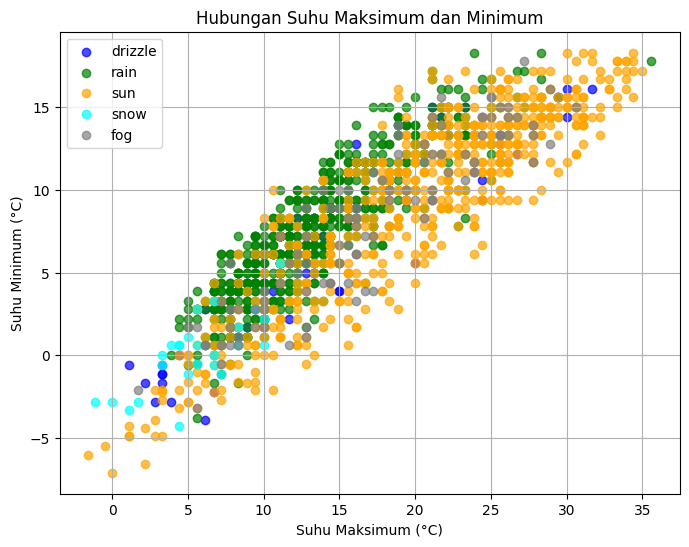

In [1731]:
colors = {'drizzle': 'blue', 'rain': 'green', 'fog': 'gray', 'sun': 'orange', 'snow': 'cyan'}

plt.figure(figsize=(8, 6))
for weather_type in df['weather'].unique():
    plt.scatter(df[df['weather'] == weather_type]['temp_max'],
                df[df['weather'] == weather_type]['temp_min'],
                color=colors.get(weather_type, 'black'),
                label=weather_type,
                alpha=0.7)
plt.title('Hubungan Suhu Maksimum dan Minimum')
plt.xlabel('Suhu Maksimum (°C)')
plt.ylabel('Suhu Minimum (°C)')
plt.grid(True)
plt.legend()
plt.show()

### 2. Jumlah Data Pada Tipe Weather

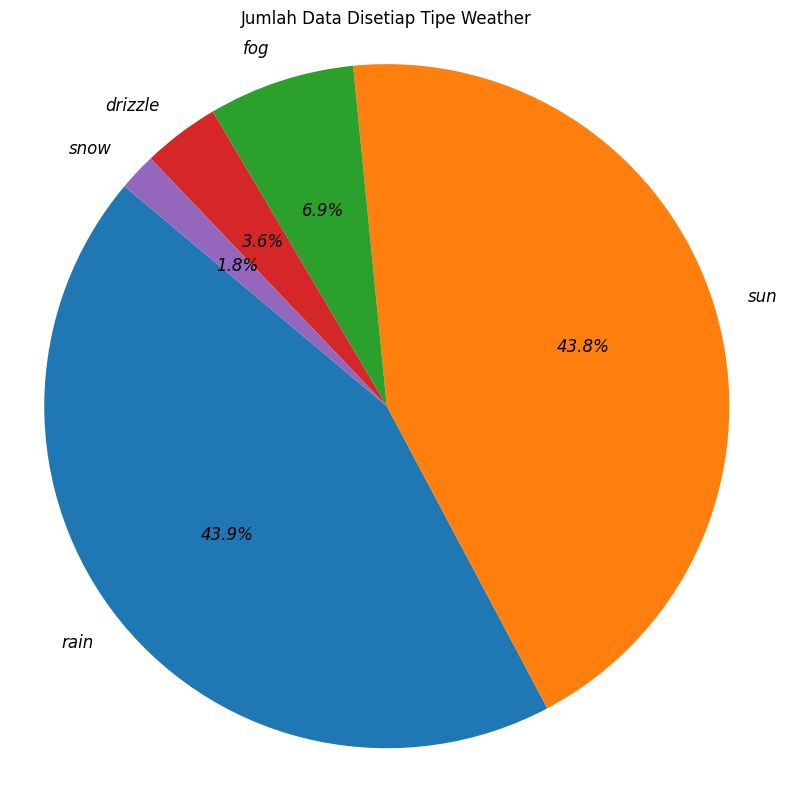

In [1732]:
jmlhDataWeather = df['weather'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(jmlhDataWeather, labels=jmlhDataWeather.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12, 'color': 'black', 'style': 'italic'})
plt.title('Jumlah Data Disetiap Tipe Weather')
plt.axis('equal')
plt.gca().set_aspect('equal')
plt.tight_layout()

plt.show()

### 3. Curah Hujan dari Tahun ke Tahun (2012-2015)

<Figure size 1000x600 with 0 Axes>

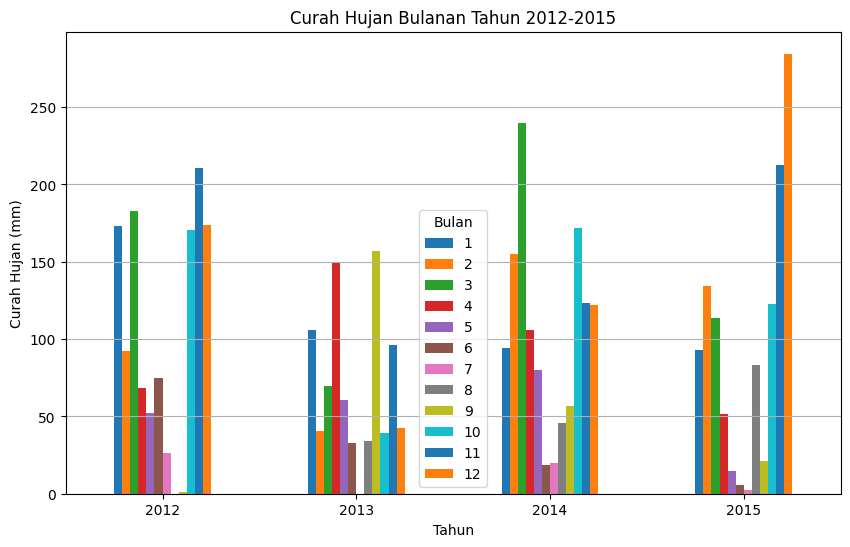

In [1733]:
monthly_precipitation = df['precipitation'].groupby([df.index.year, df.index.month]).sum()


plt.figure(figsize=(10, 6))
monthly_precipitation.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Curah Hujan Bulanan Tahun 2012-2015')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.grid(axis='y')
plt.legend(title='Bulan')
plt.xticks(rotation=0)
plt.show()

### 4. Hubungan Antara Kecepatan Angin dan Curah Hujan

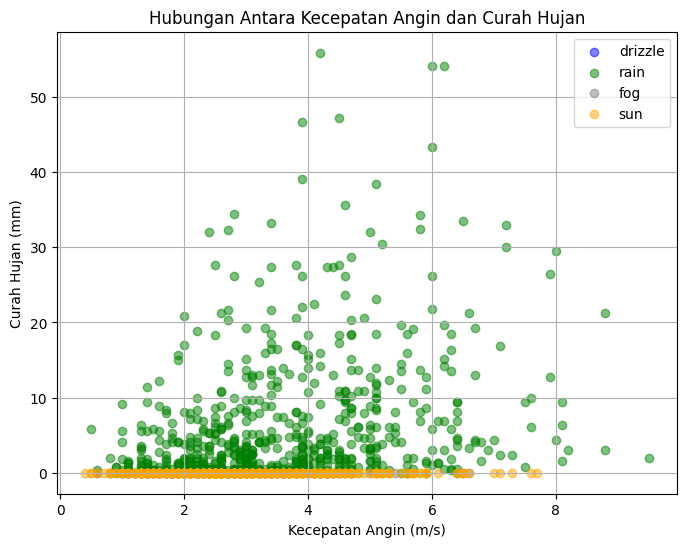

In [1734]:
color_dict = {'drizzle': 'blue', 'rain': 'green', 'fog': 'gray', 'sun': 'orange'}

plt.figure(figsize=(8, 6))
for weather_type, color in color_dict.items():
    plt.scatter(df[df['weather'] == weather_type]['wind'], df[df['weather'] == weather_type]['precipitation'],
                alpha=0.5, label=weather_type, color=color)
plt.title('Hubungan Antara Kecepatan Angin dan Curah Hujan')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.legend()
plt.show()

### 5. Pola Perubahan Suhu Maksimum dan Minimum Tahunan (2012-2015)

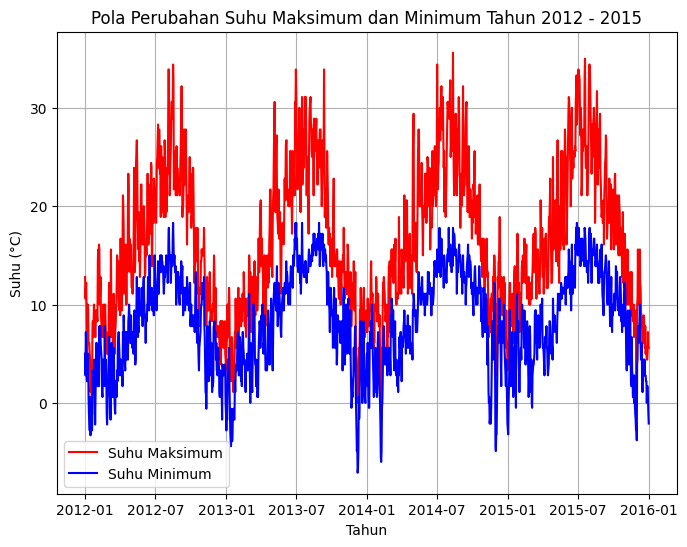

In [1735]:
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['temp_max'], label='Suhu Maksimum', color='red')
plt.plot(df.index, df['temp_min'], label='Suhu Minimum', color='blue')

plt.title('Pola Perubahan Suhu Maksimum dan Minimum Tahun 2012 - 2015')
plt.xlabel('Tahun')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid(True)
plt.show()

### Untuk mengetahui nilai unik pada fitur weather

In [1736]:
cuaca = ', '.join(df['weather'].unique())
cuaca

'drizzle, rain, sun, snow, fog'

### Keterangan numerik pada fitur weather

In [1737]:
numerik_cuaca = {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}

print("Keterangan nilai numerik cuaca:")
for cuaca, kode in numerik_cuaca.items():
    print(f"{kode} = {cuaca}")

Keterangan nilai numerik cuaca:
0 = drizzle
1 = fog
2 = rain
3 = snow
4 = sun


### Merubah isi fitur weather dari object ke numeric, agar bisa dihitung

In [1738]:
en = LabelEncoder()
df['weather'] = en.fit_transform(df['weather'])
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0
2012-01-02,10.9,10.6,2.8,4.5,2
2012-01-03,0.8,11.7,7.2,2.3,2
2012-01-04,20.3,12.2,5.6,4.7,2
2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,2
2015-12-28,1.5,5.0,1.7,1.3,2
2015-12-29,0.0,7.2,0.6,2.6,1


#### Fitur weather sudah berubah tipe datanya

In [1739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.5 KB


### x akan menjadi dataframe baru tanpa fitur weather dan y berisi nilai numeric dari fitur weather

In [1740]:
x=df.drop('weather',axis=1)
y=df['weather']

In [1741]:
x

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9
2015-12-28,1.5,5.0,1.7,1.3
2015-12-29,0.0,7.2,0.6,2.6


In [1742]:
y

date
2012-01-01    0
2012-01-02    2
2012-01-03    2
2012-01-04    2
2012-01-05    2
             ..
2015-12-27    2
2015-12-28    2
2015-12-29    1
2015-12-30    4
2015-12-31    4
Name: weather, Length: 1461, dtype: int64

In [1743]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 68.5 KB


### Pemisahan Dataframe menjadi Variabel Fitur (x) dan Variabel Target (y)

In [1744]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Menampilkan x

In [1745]:
x

array([[ 0. , 12.8,  5. ,  4.7],
       [10.9, 10.6,  2.8,  4.5],
       [ 0.8, 11.7,  7.2,  2.3],
       ...,
       [ 0. ,  7.2,  0.6,  2.6],
       [ 0. ,  5.6, -1. ,  3.4],
       [ 0. ,  5.6, -2.1,  3.5]])

### Menampilkan y

In [1746]:
y

array([0, 2, 2, ..., 1, 4, 4])

### Membagi data latih dan data uji

In [1747]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=False, random_state=random_state)

### Menampilkan shape data train dan test

In [1748]:
for data_name, data in zip(["X_train", "X_test", "y_train", "y_test"], [X_train, X_test, y_train, y_test]):
    print(f"{data_name} shape:", data.shape)

X_train shape: (876, 4)
X_test shape: (585, 4)
y_train shape: (876,)
y_test shape: (585,)


### sc digunakan untuk pengskalaan fitur
#### X_train = sc.fit_transform digunakan untuk mean dan standar deviasi pada data train
#### X_test = sc.fit_transform digunakan untuk mean dan standar deviasi pada data test

In [1749]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Menampilkan training data X

In [1750]:
X_train

array([[-0.48277769, -0.34200935, -0.48403759,  0.93669489],
       [ 1.20621014, -0.65187744, -0.93022175,  0.80432762],
       [-0.35881528, -0.49694339, -0.03785342, -0.65171238],
       ...,
       [ 0.10604376,  0.6721044 ,  1.0978881 ,  0.47340944],
       [-0.48277769,  0.43266088,  0.75310942, -0.58552875],
       [ 0.38495918, -0.03214126,  0.65170393, -1.24736511]])

### Menampilkan testing data X

In [1751]:
X_test

array([[-0.48277769,  0.43266088,  0.75310942,  0.80432762],
       [-0.48277769,  0.6721044 ,  0.53001734, -0.51934511],
       [-0.48277769,  0.51717036,  0.53001734,  0.07630762],
       ...,
       [-0.48277769, -1.13076448, -1.37640592, -0.45316147],
       [-0.48277769, -1.35612309, -1.7009035 ,  0.07630762],
       [-0.48277769, -1.35612309, -1.92399558,  0.14249125]])

### Menampilkan training data y

In [1752]:
y_train

array([0, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 3, 4, 3, 3, 4, 2, 4, 2, 2, 3,
       4, 4, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 4, 4, 2, 0, 2, 2,
       2, 2, 2, 2, 4, 2, 4, 3, 2, 4, 4, 4, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 0, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 0, 4, 4, 2, 2, 0, 1, 0, 2, 2, 2, 2,
       4, 4, 4, 2, 4, 2, 2, 4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 2, 0,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 1, 4, 0, 0,
       0, 2, 1, 1, 4, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,

### Menampilkan testing data y

In [1753]:
y_test

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 4, 4, 4, 1, 1, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 4, 1, 4, 2, 2, 2, 2, 2, 1, 1, 2, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 1, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 4, 1, 1, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 1, 1, 2, 2, 1, 4, 4,
       4, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 4, 1, 4, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1,
       1, 1, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,

### Untuk membuat model klasifikasi Naive Bayes Gaussian

In [1754]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Prediksi kelas menggunakan model lasifikasi

In [1755]:
y_pred = classifier.predict(X_test)
print(y_pred)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4
 4 4 4 2 2 2 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 2 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 2 2 4 4 4 2 2 2 2 2 4 4 2 4 4 4 4 4 4 4 4 4 4 2 2 4 2 2 2 4 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2
 2 2 3 4 0 4 4 2 2 2 4 2 2 2 2 4 4 4 4 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 4 0 3
 4 2 2 4 4 4 2 2 2 4 4 4 2 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 4 2 2 2 2 2 2 2 2
 2 2 4 2 4 2 4 4 4 4 2 2 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 2 2 4 2 2 2 2 2
 4 4 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 4 4 2 4 4 2 2 4 4 4 4 4 4 2 4 2
 2 2 4 2 2 4 4 4 4 4 4 2 4 4 4 4 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2
 4 2 4 4 4 4 4 2 4 4 4 4 4 4 4 2 2 2 4 2 4 4 4 2 2 2 4 4 4 4 4 2 4 4 2 2 4
 4 2 4 4 4 4 2 4 4 4 4 4 

### Penghitungan matriks confusion

In [1756]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   0,   7],
       [  1,   0,   0,   0,  75],
       [  0,   0, 217,   3,   0],
       [  0,   0,   0,   1,   0],
       [  2,   0,   0,   0, 279]])

### Laporan klasifikasi

In [1757]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        76
           2       1.00      0.99      0.99       220
           3       0.25      1.00      0.40         1
           4       0.77      0.99      0.87       281

    accuracy                           0.85       585
   macro avg       0.40      0.60      0.45       585
weighted avg       0.75      0.85      0.79       585



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tingat akurasi

In [1758]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat akurasi : %d persen"%(akurasi*100))

Tingkat akurasi : 84 persen


### Menampilkan DataFrame dari data hasil prediksi

In [1759]:
ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y_pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
...,...,...
580,2,3
581,2,2
582,1,4
583,4,4
